In [1]:
import numpy as np
"""
Objective:

1. Compute 10 features for input of SVM

    Input: Subject, Channel, TimeSamplePoint

    Output: Subject, Channel x Features

    Requirement: 
        index_start: datapoint of VFT start
        index_end: datapoint of VFT end

2. Use Genetic Algorithm to Train the data based on SVM

Ref: https://www.mathworks.com/matlabcentral/fileexchange/99804-machine-learning-framework-for-identification-of-depression
"""
# hb = np.random.rand(100,52,125) - 0.5
original_data = np.load('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/correct_channel_data.npy')
label = np.load(
    '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/label.npy')
original_data = np.transpose(original_data, (0, 2, 1))

# Normalize 
def normalize(data):
    print(f'data.shape -> {data.shape}')
    # Iterate over each subject
    normalized_data = np.empty_like(data)
    for i in range(data.shape[0]):
        # Calculate the mean and standard deviation for the current subject
        mean = np.mean(data[i, :])
        std = np.std(data[i, :])

        # Perform z-normalization for the current subject
        normalized_data[i, :] = (data[i, :] - mean) / std
    return normalized_data


def li_svm_compute_10_fetures(hb, index_start=10, index_end=70):

    hb_task = hb[:, :, index_start:index_end]

    # 1. Integral Raw
    feature_1 = normalize(np.sum(hb_task, axis=2))
    # print(f' feature_1 - {feature_1.shape}')

    # 2. Integral Positive
    feature_2 = normalize(np.sum(np.where(hb_task < 0, 0, hb_task), axis=2))
    # print(f'feature_2 - {feature_2.shape}')

    # 3. Integral Zero-Norm
    feature_3 = normalize(np.sum(hb_task - np.min(hb_task, axis=(0, 1, 2)), axis=2))
    # print(f'feature_3 - {feature_3.shape}')

    # 4. Integral Absolute
    feature_4 = normalize(np.sum(np.abs(hb_task), axis=2))
    print(f'feature_4 - {feature_4.shape}')

    # 5. Integral (CUM)
    cum_hb_task = np.cumsum(hb_task, axis=2)
    feature_5 = normalize(np.sum(cum_hb_task, axis=2))
    # print(f'feature_5 - {feature_5.shape}')

    # 6. Integral (CUM) Positive
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = np.where(cum_hb_task < 0, 0, cum_hb_task)
    feature_6 = normalize(np.sum(cum_hb_task, axis=2))
    # print(f'feature_6 - {feature_6.shape}')

    # 7. Integral (CUM) Zero-Norm
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = cum_hb_task - np.min(cum_hb_task, axis=(0, 1, 2))
    feature_7 = normalize(np.sum(cum_hb_task, axis=2))
    # print(f'feature_7 - {feature_7.shape}')

    # 8. Integral (CUM) Absolute
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = np.abs(cum_hb_task)
    feature_8 = normalize(np.sum(cum_hb_task, axis=2))
    # print(f'feature_8 - {feature_8.shape}')

    # 9. Centroid (CUM) Positive
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = np.abs(cum_hb_task)
    hb_task_sum = np.sum(cum_hb_task, axis=2)/2
    abs_cum_hb_task_minus_sum_2 = np.abs(
        cum_hb_task - hb_task_sum[:, :, np.newaxis])
    feature_9 = normalize(np.argmin(abs_cum_hb_task_minus_sum_2, axis=2))
    # print(f'feature_9 - {feature_9.shape}')

    # 10. Centroid (CUM) Zero-Norm
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = cum_hb_task - np.min(cum_hb_task, axis=(0, 1, 2))
    hb_task_sum = np.sum(cum_hb_task, axis=2)/2
    abs_cum_hb_task_minus_sum_2 = np.abs(
        cum_hb_task - hb_task_sum[:, :, np.newaxis])
    feature_10 = normalize(np.argmin(abs_cum_hb_task_minus_sum_2, axis=2))
    # print(f'feature_10 - {feature_10.shape}')

    feature_sum = np.concatenate((feature_1[:,:,np.newaxis],
                                feature_2[:,:,np.newaxis],
                                feature_3[:,:,np.newaxis],
                                feature_4[:,:,np.newaxis],
                                feature_5[:,:,np.newaxis],
                                feature_6[:,:,np.newaxis],
                                feature_7[:,:,np.newaxis],
                                feature_8[:,:,np.newaxis],
                                feature_9[:,:,np.newaxis],
                                feature_10[:,:,np.newaxis]), axis=2)

    res = np.reshape(feature_sum, (feature_sum.shape[0], -1))
    # print(res.shape)
    return res

data = li_svm_compute_10_fetures(original_data)
2
print(f'output data shape -> {data.shape}')

data.shape -> (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
feature_4 - (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
data.shape -> (458, 52)
output data shape -> (458, 520)


/var/folders/dj/c5r3qbs52hg_qgrqgmmp61_m0000gn/T/ipykernel_6305/409417346.py:36: RuntimeWarning: invalid value encountered in divide
  normalized_data[i, :] = (data[i, :] - mean) / std
/var/folders/dj/c5r3qbs52hg_qgrqgmmp61_m0000gn/T/ipykernel_6305/409417346.py:36: RuntimeWarning: invalid value encountered in cast
  normalized_data[i, :] = (data[i, :] - mean) / std


(458, 520)
(343, 520)
(115, 520)


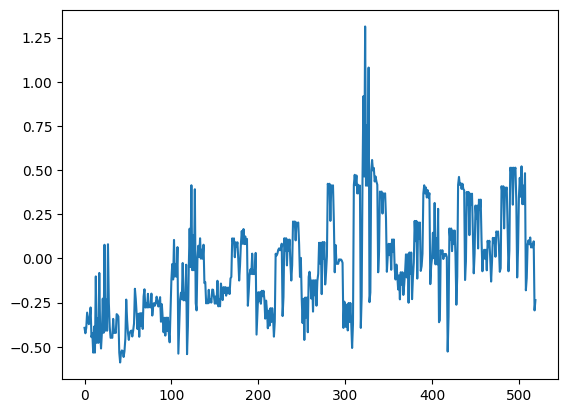

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.25)

# Validate the result by ploting the label == 1 and label == 0, as well as the shape 
print(data.shape)
print(X_train.shape)
print(X_test.shape)

plt.plot(np.mean(X_train,axis=0))

In [2]:
from deap import base, creator, tools
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
import random

for random_i in range(1):

    X_train, X_test, Y_train, Y_test = train_test_split(
        data, label, test_size=0.25, random_state=random_i)

    train_best_acc_detail = []
    test_best_acc_detail = []
    # Total features
    n_features = 520  # 52 channels each with 10 features

    # Number of populations
    n_population = 200

    # Number of generations
    n_generation = 300

    # Probability with which two individuals are crossed
    cxpb = 0.5
    # Probability for mutating an individual
    mutpb = 0.2

    # If you want the GA to prioritize one over the other, you'll need to adjust the weights when you create the FitnessMax. For example, if you only care about test accuracy, you can set the weight of the training accuracy to 0:
    # creator.create("FitnessMax", base.Fitness, weights=(0.0, 1.0))
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 0, 2)
    toolbox.register("individual", tools.initRepeat,
                     creator.Individual, toolbox.attr_bool, n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_features(individual):
        # Select features where bit is 1
        selected_features = [i for i, bit in enumerate(individual) if bit == 1]
        # If no features selected, return a very poor fitness
        if len(selected_features) == 0:
            return (0.0,)
        # Extract these features from the dataset
        X_selected_train = X_train[:, selected_features]
        # Train and evaluate a classifier
        clf = SVC()
        # , test = ....
        scores = cross_val_score(clf, X_selected_train, Y_train, cv=5)

        # Train the classifier on the entire training dataset
        clf.fit(X_selected_train, Y_train)

        # Evaluate the classifier on the test dataset
        X_selected_test = X_test[:, selected_features]
        test_score = clf.score(X_selected_test, Y_test)

        return (scores.mean(), test_score)

    toolbox.register("evaluate", eval_features)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Now you can initialize population and run the algorithm.
    # Create an initial population of 200 individuals (each individual is a combination of features)
    population = toolbox.population(n=n_population)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    all_gen_fit_result = []
    for gen in range(n_generation):
        train_best_acc_detail.append(np.max([ind.fitness.values[0] for ind in population]))
        test_best_acc_detail.append(np.max([ind.fitness.values[1] for ind in population]))
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutpb:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]

        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            all_gen_fit_result.append(fit)
        # Replace the old population by the offspring
        population[:] = offspring

    # Extract and print the final statistics
    fits = [ind.fitness.values[0] for ind in population]
    length = len(population)
    mean = sum(fits) / length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2 / length - mean**2)**0.5

    # Select 1 individual from the population
    best_ind = tools.selBest(population, 1)[0]
    selected_features = [index for index,
                         bit in enumerate(best_ind) if bit == 1]

    X_selected_train = X_train[:, selected_features]
    X_selected_test = X_test[:, selected_features]
    clf = SVC(probability=True)

    # Perform 5-fold cross-validation on the training set
    cv_scores = cross_val_score(clf, X_selected_train, Y_train, cv=5)

    # Print the cross-validation results
    print(f'5-fold cross validation scores: {cv_scores}')
    print(f'Average 5-fold CV Score: {cv_scores.mean():.2f}')

    # Train the classifier on the entire training dataset
    clf.fit(X_selected_train, Y_train)

    # Evaluate on the test set
    test_accuracy = clf.score(X_selected_test, Y_test)
    print(f'Held out test set result: {test_accuracy:.2f}')

5-fold cross validation scores: [0.75362319 0.57971014 0.57971014 0.75       0.69117647]
Average 5-fold CV Score: 0.67
Held out test set result: 0.55


Text(0.5, 0, 'Generation')

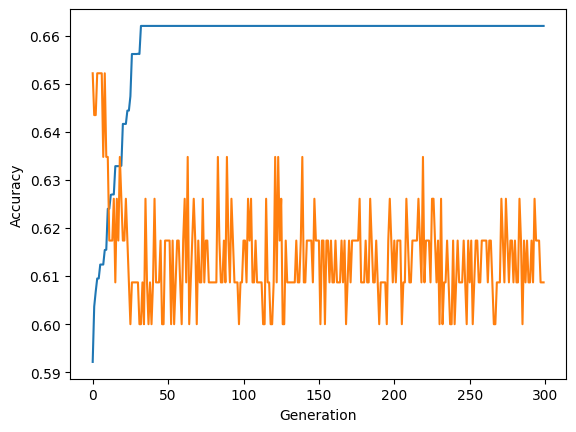

In [45]:
plt.plot(train_best_acc_detail, label='Train')

plt.plot(test_best_acc_detail, label='Test')

plt.ylabel('Accuracy')
plt.xlabel('Generation')

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Define the classifier
clf = SVC(probability=True)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(clf, X_selected_train, Y_train, cv=5)

# Print the cross-validation results
print(f'5-fold cross validation scores: {cv_scores}')
print(f'Average 5-fold CV Score: {cv_scores.mean():.2f}')

# Train the classifier on the entire training dataset
clf.fit(X_selected_train, Y_train)

# Evaluate on the test set
test_accuracy = clf.score(X_selected_test, Y_test)
print(f'Held out test set result: {test_accuracy:.2f}')


5-fold cross validation scores: [0.69565217 0.55072464 0.47826087 0.60294118 0.61764706]
Average 5-fold CV Score: 0.59
Held out test set result: 0.57


In [12]:
print(f'ind.fitness.values = {ind.fitness.values}')
print(f'fit = {fit}')

print(f'all_gen_fit_result -> {all_gen_fit_result}')

ind.fitness.values = (0.6707161125319694, 0.6260869565217392)
fit = (0.6707161125319694, 0.6260869565217392)
all_gen_fit_result -> [(0.6005967604433078, 0.5739130434782609), (0.618158567774936, 0.5739130434782609), (0.5916453537936913, 0.6173913043478261), (0.6326086956521739, 0.6), (0.6034526854219948, 0.5478260869565217), (0.6060954816709293, 0.5478260869565217), (0.6123188405797101, 0.591304347826087), (0.606308610400682, 0.6260869565217392), (0.5859335038363171, 0.6), (0.603537936913896, 0.5565217391304348), (0.5916027280477408, 0.6086956521739131), (0.6210997442455243, 0.5565217391304348), (0.585763000852515, 0.6521739130434783), (0.6092924126172208, 0.5826086956521739), (0.5977408354646206, 0.6), (0.5711849957374254, 0.6), (0.6093350383631713, 0.5652173913043478), (0.6034526854219949, 0.6260869565217392), (0.6007246376811594, 0.6260869565217392), (0.6179880647911339, 0.5826086956521739), (0.5889599317988065, 0.5826086956521739), (0.6122762148337596, 0.5652173913043478), (0.609377

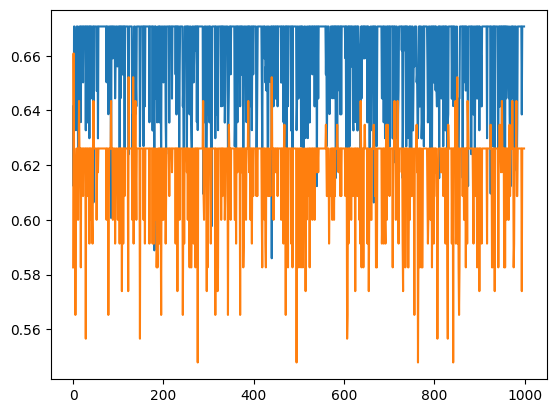

In [24]:
import matplotlib.pyplot as plt 
res_train = [i[0] for i in all_gen_fit_result]
res_test = [i[1] for i in all_gen_fit_result]
plt.plot(res_train[-1000:])
plt.plot(res_test[-1000:])

In [25]:
for ind, fit in zip(invalid_ind, fitnesses):
    print(fit)

In [27]:
invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
print(invalid_ind)

[]


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
clf = SVC(probability=True)
# Define sensitivity and specificity
def sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Initialize lists to store scores for each fold
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
f1_scores = []
roc_auc_scores = []

# Loop over each fold
for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the classifier on the training data and predict on the test data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    
    # Compute the metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    sensitivity_scores.append(sensitivity(y_test, y_pred))
    specificity_scores.append(specificity(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))

# Now, accuracy_scores, sensitivity_scores, specificity_scores, f1_scores, and roc_auc_scores
# each contain the scores for each metric for each fold of the cross-validation.

# print(f' accuracy -> {np.mean(accuracy_scores)}')
# print(f' sensitivity_scores -> {np.mean(sensitivity_scores)}')
# print(f' specificity_scores -> {np.mean(specificity_scores)}')
# print(f' f1_scores -> {np.mean(f1_scores)}')
# print(f' roc_auc_scores -> {np.mean(roc_auc_scores)}')

print(f' accuracy -> {accuracy_scores}')
print(f' sensitivity_scores -> {sensitivity_scores}')
print(f' specificity_scores -> {specificity_scores}')
print(f' f1_scores -> {f1_scores}')
print(f' roc_auc_scores -> {roc_auc_scores}')

 accuracy -> [0.6304347826086957, 0.717391304347826, 0.6956521739130435, 0.7608695652173914, 0.6521739130434783, 0.6304347826086957, 0.6956521739130435, 0.5652173913043478, 0.4888888888888889, 0.6666666666666666]
 sensitivity_scores -> [0.5714285714285714, 0.6190476190476191, 0.5, 0.5909090909090909, 0.5, 0.3181818181818182, 0.5, 0.36363636363636365, 0.3333333333333333, 0.38095238095238093]
 specificity_scores -> [0.68, 0.8, 0.875, 0.9166666666666666, 0.7916666666666666, 0.9166666666666666, 0.875, 0.75, 0.625, 0.9166666666666666]
 f1_scores -> [0.5853658536585366, 0.6666666666666666, 0.6111111111111112, 0.7027027027027029, 0.5789473684210527, 0.45161290322580644, 0.6111111111111112, 0.4444444444444444, 0.37837837837837834, 0.5161290322580645]
 roc_auc_scores -> [0.6971428571428571, 0.7333333333333333, 0.6742424242424242, 0.8295454545454545, 0.7215909090909091, 0.6231060606060606, 0.6988636363636362, 0.6496212121212122, 0.4801587301587302, 0.6656746031746033]


In [2]:
feature_sum = np.concatenate((feature_1[:,:,np.newaxis],
                              feature_2[:,:,np.newaxis],
                              feature_3[:,:,np.newaxis],
                              feature_4[:,:,np.newaxis],
                              feature_5[:,:,np.newaxis],
                              feature_6[:,:,np.newaxis],
                              feature_7[:,:,np.newaxis],
                              feature_8[:,:,np.newaxis],
                              feature_9[:,:,np.newaxis],
                              feature_10[:,:,np.newaxis]), axis=2)

data = np.reshape(feature_sum, (feature_sum.shape[0], -1))
print(data.shape)
print(label.shape)

(458, 520)
(458,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming data is your feature set and labels is your labels
# data.shape should be (n_samples, n_features)
# labels.shape should be (n_samples,)


# Split the data and labels into a training set and a test set
# The test set size is 25% of the entire dataset
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create a SVM Classifier with a linear kernel
clf = SVC(kernel="linear",C=1)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.532608695652174


In [129]:
cum_hb_task = np.cumsum(hb_task,axis=2)
hb_task_sum = np.sum(cum_hb_task,axis=2)/2
cum_hb_task_minus_sum_2 = cum_hb_task - hb_task_sum[:, :, np.newaxis]
abs_cum_hb_task_minus_sum_2 = np.abs(cum_hb_task_minus_sum_2)
np.argmin(abs_cum_hb_task_minus_sum_2,axis=2)

array([[59, 59, 59, ..., 22, 59, 43],
       [59, 59, 59, ..., 54, 58, 56],
       [59, 59, 59, ..., 59, 59, 59],
       ...,
       [59, 59, 24, ..., 59, 59, 59],
       [59, 59, 59, ..., 59, 59, 59],
       [59, 22, 21, ..., 59, 59, 59]])

In [121]:
np.argmin(abs_cum_hb_task_minus_sum_2,axis=2).shape

(458, 52)

abs_hb_task_cum_minus_sum_2 -> 22
abs_hb_task_cum_minus_sum_2 -> 22


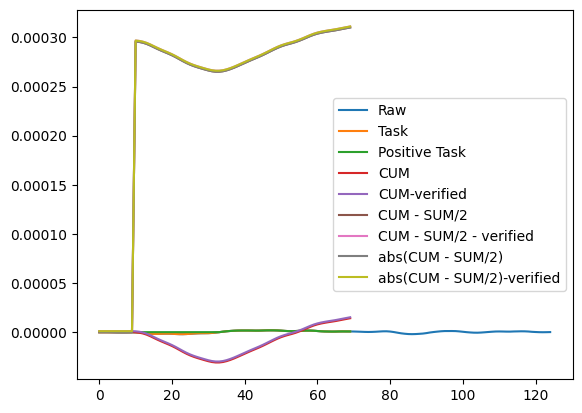

In [130]:
import matplotlib.pyplot as plt
plt.plot(hb[0,5,:], label='Raw')
plt.plot(np.concatenate((np.zeros(10),hb_task[0,5,:])), label='Task')
# print(hb.shape)


hb_task_pos = np.where(hb_task < 0, 0, hb_task)

plt.plot(np.concatenate((np.zeros(10),hb_task_pos[0,5,:])), label='Positive Task')

hb_task_cum = np.cumsum(hb_task[0,5,:])
hb_task_cum_minus_sum_2 = hb_task_cum - sum(hb_task_cum)/2
abs_hb_task_cum_minus_sum_2 = abs(hb_task_cum - sum(hb_task_cum)/2)
plt.plot(np.concatenate((np.zeros(10),hb_task_cum)), label='CUM')
plt.plot(np.concatenate((np.zeros(10),cum_hb_task[0,5]))+1/1e6, label='CUM-verified')


plt.plot(np.concatenate((np.zeros(10),hb_task_cum_minus_sum_2)), label='CUM - SUM/2')
plt.plot(np.concatenate((np.zeros(10),cum_hb_task_minus_sum_2[0,5]))+1/1e6, label='CUM - SUM/2 - verified')



plt.plot(np.concatenate((np.zeros(10),abs_hb_task_cum_minus_sum_2)), label='abs(CUM - SUM/2)')
plt.plot(np.concatenate((np.zeros(10),abs_cum_hb_task_minus_sum_2[0,5]))+1/1e6, label='abs(CUM - SUM/2)-verified')

plt.legend()

print(f'abs_hb_task_cum_minus_sum_2 -> {np.argmin(abs_hb_task_cum_minus_sum_2)}')
print(f'abs_hb_task_cum_minus_sum_2 -> {np.argmin(abs_cum_hb_task_minus_sum_2,axis=2)[0,5]}')

In [ ]:
import numpy as np
"""
Objective: compute 10 features for input of SVM

Input: Subject x Channel x TimeSamplePoint

Output: Subject x Channel x Features

Requirement: 
    index_start: datapoint of VFT start
    index_end: datapoint of VFT end

Ref: https://www.mathworks.com/matlabcentral/fileexchange/99804-machine-learning-framework-for-identification-of-depression
"""
# hb = np.random.rand(100,52,125) - 0.5
original_data = np.load('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/correct_channel_data.npy')
label = np.load(
    '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/label.npy')
original_data = np.transpose(original_data, (0, 2, 1))

def li_svm_compute_10_fetures(hb):
    index_start = 10
    index_end = 70
    hb_task = hb[:, :, index_start:index_end]

    # 1. Integral Raw
    feature_1 = np.sum(hb_task, axis=2)
    # print(f' feature_1 - {feature_1.shape}')

    # 2. Integral Positive
    feature_2 = np.sum(np.where(hb_task < 0, 0, hb_task), axis=2)
    # print(f'feature_2 - {feature_2.shape}')

    # 3. Integral Zero-Norm
    feature_3 = np.sum(hb_task - np.min(hb_task, axis=(0, 1, 2)), axis=2)
    # print(f'feature_3 - {feature_3.shape}')

    # 4. Integral Absolute
    feature_4 = np.sum(np.abs(hb_task), axis=2)
    print(f'feature_4 - {feature_4.shape}')

    # 5. Integral (CUM)
    cum_hb_task = np.cumsum(hb_task, axis=2)
    feature_5 = np.sum(cum_hb_task, axis=2)
    # print(f'feature_5 - {feature_5.shape}')

    # 6. Integral (CUM) Positive
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = np.where(cum_hb_task < 0, 0, cum_hb_task)
    feature_6 = np.sum(cum_hb_task, axis=2)
    # print(f'feature_6 - {feature_6.shape}')

    # 7. Integral (CUM) Zero-Norm
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = cum_hb_task - np.min(cum_hb_task, axis=(0, 1, 2))
    feature_7 = np.sum(cum_hb_task, axis=2)
    # print(f'feature_7 - {feature_7.shape}')

    # 8. Integral (CUM) Absolute
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = np.abs(cum_hb_task)
    feature_8 = np.sum(cum_hb_task, axis=2)
    # print(f'feature_8 - {feature_8.shape}')

    # 9. Centroid (CUM) Positive
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = np.abs(cum_hb_task)
    hb_task_sum = np.sum(cum_hb_task, axis=2)/2
    abs_cum_hb_task_minus_sum_2 = np.abs(
        cum_hb_task - hb_task_sum[:, :, np.newaxis])
    feature_9 = np.argmin(abs_cum_hb_task_minus_sum_2, axis=2)
    # print(f'feature_9 - {feature_9.shape}')

    # 10. Centroid (CUM) Zero-Norm
    cum_hb_task = np.cumsum(hb_task, axis=2)
    cum_hb_task = cum_hb_task - np.min(cum_hb_task, axis=(0, 1, 2))
    hb_task_sum = np.sum(cum_hb_task, axis=2)/2
    abs_cum_hb_task_minus_sum_2 = np.abs(
        cum_hb_task - hb_task_sum[:, :, np.newaxis])
    feature_10 = np.argmin(abs_cum_hb_task_minus_sum_2, axis=2)
    # print(f'feature_10 - {feature_10.shape}')

    feature_sum = np.concatenate((feature_1[:,:,np.newaxis],
                                feature_2[:,:,np.newaxis],
                                feature_3[:,:,np.newaxis],
                                feature_4[:,:,np.newaxis],
                                feature_5[:,:,np.newaxis],
                                feature_6[:,:,np.newaxis],
                                feature_7[:,:,np.newaxis],
                                feature_8[:,:,np.newaxis],
                                feature_9[:,:,np.newaxis],
                                feature_10[:,:,np.newaxis]), axis=2)

    res = np.reshape(feature_sum, (feature_sum.shape[0], -1))
    print(res.shape)
    return res

data = li_svm_compute_10_fetures(original_data)

Average Accuracy (5-fold cross-validation): 0.66
